# K-Means
### From scratch

K-Means is really just the EM (Expectation Maximization) algorithm applied to a particular naive bayes model.
- **E-Step**: Coming up with values to hidden variables, based on parameters. If you work out the math of chosing the best values for the class variable based on the features of a given piece of data in your data set, it comes out to "for each data-point, chose the centroid that it is closest to, by euclidean distance, and assign that centroid's label." 

- **M-Step**: Coming up with parameters, based on full assignments. If you work out the math of chosing the best parameter values based on the features of a given piece of data in your data set, it comes out to "take the mean of all the data-points that were labeled as c."

### 1. Initialize randomly $\mu_i$ centroids. 

### 2. $  c^{(i+1)} = arg min_j || x^{(i)} - \mu_j^{(i)} {||}^2 $

### 3. $ \mu_j^{(i+1)} = \frac{\sum_{i=1}^{m} 1 \{c^{(i)} = j\} x^{i}}{\sum_{i=1}^{m} 1 \{c^{(i)} = j\}} $

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [21]:
def fit(data, k, tol, epochs):

    centroids = {}

    for i in range(k):
        centroids[i] = data[i]

    for i in range(epochs):
        classes = {}

        for i in range(k):
            classes[i] = []

        for dim in data:
            distances = [np.linalg.norm(dim - centroids[c]) for c in centroids]
            clasS = distances.index(min(distances))
            classes[clasS].append(dim)

        prev_centroids = dict(centroids)

        for c in classes:
            centroids[c] = np.average(classes[c],axis=0)

        optimized = True

        for c in centroids:
            original_centroid = prev_centroids[c]
            current_centroid = centroids[c]
            if np.sum((current_centroid-original_centroid) / original_centroid * 100.0) > tol:
                print(np.sum((current_centroid-original_centroid) / original_centroid * 100.0))
                optimized = False

        if optimized:
            break
    return centroids, classes

def predict(data, centroids):
    distances = [np.linalg.norm(data - centroids[centroid]) for centroid in centroids]
    clasS = distances.index(min(distances))
    return clasS

## Testing

#### Load data

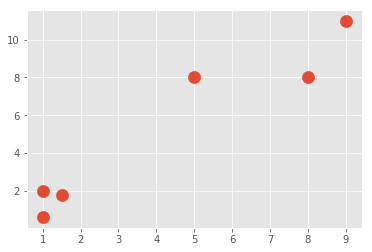

In [22]:
X = np.array([[1, 2], [1.5, 1.8], [5, 8 ], [8, 8], [1, 0.6], [9,11]])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

453.3333333333334
102.72108843537411


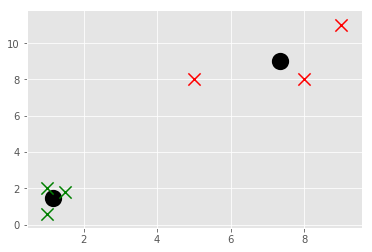

In [23]:
centroids, classes = fit(data=X, k=2, tol=0.001, epochs=10)

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], marker="o", color="k", s=150, linewidths=5)

colors = 10*["g","r","c","b","k"]
for c in classes:
    color = colors[c]
    for dim in classes[c]:
        plt.scatter(dim[0], dim[1], marker="x", color=color, s=150, linewidths=5)
        
plt.show()

## Credits & Links

https://stanford.edu/~cpiech/cs221/handouts/kmeans.html  
https://pythonprogramming.net/k-means-from-scratch-machine-learning-tutorial/